In [17]:
!pip install pmdarima

In [18]:
import os
import pandas as pd

# Directory where the CSV files are saved
csv_files_directory = './'  # Change this to the directory where the CSV files are saved

# Get a list of all CSV files that end with '_pop_data.csv'
csv_files = [file for file in os.listdir(csv_files_directory) if file.endswith('.csv')]

# Initialize a list to store DataFrames for each country
country_dataframes = []

# Loop through the CSV files and read them into DataFrames
for csv_file in csv_files:
    country_df = pd.read_csv(csv_file)
    # print(os.path.splitext(csv_file)[0])
    # country_df = country_df.sort_values(by='Year', ascending=True)
    country_dataframes.append(country_df)


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#load the data
data = pd.read_csv('/content/canada.csv')

# Sort the DataFrame in ascending order
data = data.sort_values(by=data.columns.tolist())

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

#divide into train and validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

#preprocessing (since arima takes univariate series as input)
train.drop('Year',axis=1,inplace=True)
valid.drop('Year',axis=1,inplace=True)
print(train.dtypes)

GDP    float64
dtype: object


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=376.715, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=372.387, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=371.080, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=397.072, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=372.984, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=373.012, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=382.149, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.779 seconds


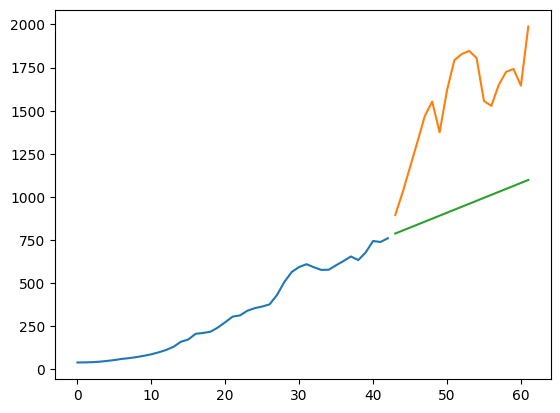

In [20]:
#building the model

from pmdarima.arima import auto_arima

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [21]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

648.34744784801


In [22]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

data = pd.read_csv('/content/canada.csv')

# Sort the DataFrame in ascending order
data = data.sort_values(by=data.columns.tolist())

year = data['Year'].astype(str)
data['Year'] = pd.to_datetime(year)
    # Set 'date' column as the index
data.set_index('Year', inplace=True)


model = pm.auto_arima(data['GDP'])

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -355.421
Date:                Sun, 06 Aug 2023   AIC                            714.843
Time:                        10:41:39   BIC                            719.064
Sample:                    01-01-1960   HQIC                           716.497
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     31.9325     10.673      2.992      0.003      11.014      52.851
sigma2      6736.3923    680.207      9.903      0.000    5403.211    8069.574
Ljung-Box (L1) (Q):                   0.68   Jarque-

In [23]:
index_of_fc= pd.date_range(start=data.index[-1], periods=12+1, freq='A')[1:]
index_of_fc

DatetimeIndex(['2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

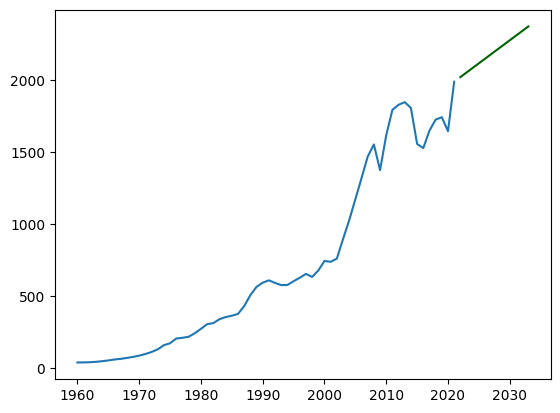

In [24]:
# Forecast

# make series for plotting purpose
n_periods = 12  # For example, forecasting 12 months ahead


# Forecast using the fitted model
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Create a series for plotting purposes
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted, color='darkgreen')


plt.show()

In [25]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

data = pd.read_csv('/content/albania.csv')

# Sort the DataFrame in ascending order
data = data.sort_values(by=data.columns.tolist())

year = data['Year'].astype(str)
data['Year'] = pd.to_datetime(year)
    # Set 'date' column as the index
data.set_index('Year', inplace=True)


model = pm.auto_arima(data['GDP']
    )

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   38
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -48.237
Date:                Sun, 06 Aug 2023   AIC                            104.473
Time:                        10:41:40   BIC                            110.917
Sample:                    01-01-1984   HQIC                           106.745
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6762      0.322      2.097      0.036       0.044       1.308
ar.L1         -0.4969      0.335     -1.482      0.138      -1.154       0.160
ma.L1          0.8185      0.168      4.882      0.0

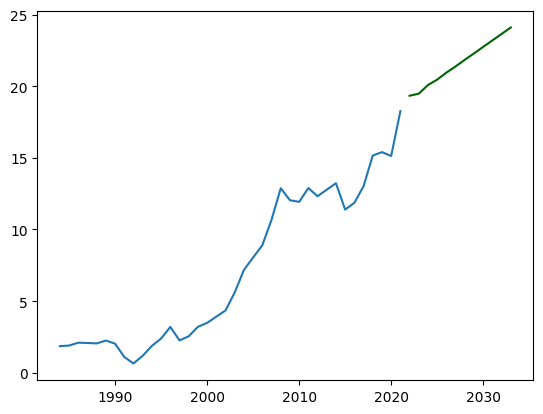

In [26]:
# Forecast

# make series for plotting purpose
n_periods = 12  # For example, forecasting 12 months ahead


# Forecast using the fitted model
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Create a series for plotting purposes
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted, color='darkgreen')


plt.show()